# BITSTAMP BTC/USD market

### OHLCV data Exploratory Analysis

### Packages

In [1]:
# External packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 


# Internal packages
import sys
sys.path.append('../../Time_Series_Forecasting/TS_helpers/')
sys.path.append('../../Time_Series_Forecasting/')

data_dir = '../../Data/Coins/BTC_USD/bitcoin-historical-data/'
from dates_kaggle1min import make_all_time_indexes, make_integer_time_index





## TS plot

import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

### Load Data and parse Date

In [2]:
# data = pd.read_csv(data_dir + 'bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')
# print(data.shape)
# data.head()

In [3]:
# # get date from unix timestamp
# data['time_exchange'] = data['Timestamp'].apply(lambda x : datetime.datetime.utcfromtimestamp(int(x)))
# # make the time indexes as standard
# data = make_all_time_indexes(data)
# data.head()

##### The process was done once and saved as csv so just load the processed data frame

In [4]:
data = pd.read_csv(data_dir + 'bitstampUSD_1-min_data_with_timecols.csv', index_col='Unnamed: 0')
print(data.shape)
data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3778817, 20)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_exchange,year,month,day,hour,minute,time_year,time_month,time_day,time_hour,time_minute,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011,12,31,7,52,2011,201112,20111231,2011123107,201112310752,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00,2011,12,31,7,53,2011,201112,20111231,2011123107,201112310753,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00,2011,12,31,7,54,2011,201112,20111231,2011123107,201112310754,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00,2011,12,31,7,55,2011,201112,20111231,2011123107,201112310755,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00,2011,12,31,7,56,2011,201112,20111231,2011123107,201112310756,2011-12-31


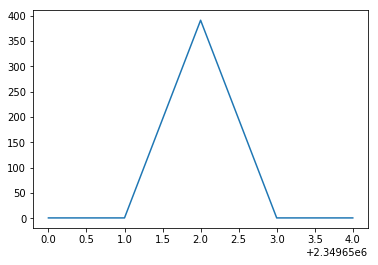

In [134]:
(data['Open']/ data['Close'])[2349650:2349655].plot()

In [30]:
data[data['Weighted_Price'].notna()].shape

(2551132, 21)

### Basics

### Distribution over time cycles

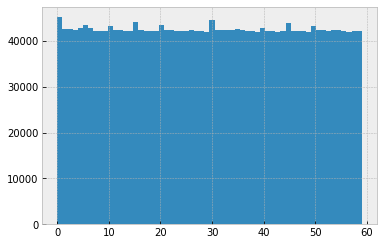

In [6]:
with plt.style.context('bmh'):
    data[data['Close'].notna()]['minute'].hist(bins=60)

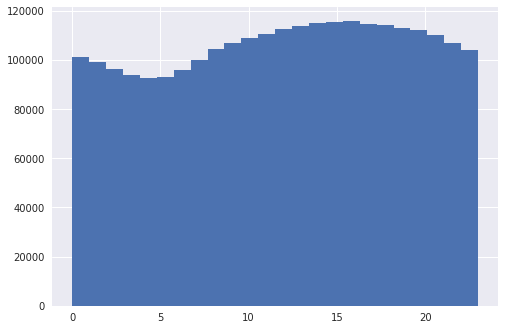

In [105]:
with plt.style.context('seaborn'):
    data[data['Close'].notna()]['hour'].hist(bins=24)    

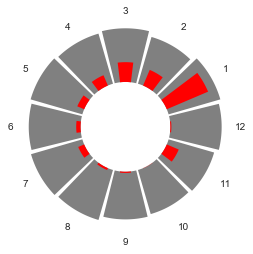

In [9]:
# %matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

hours = data['month'].unique()
hours.sort()

cmap = cm.get_cmap('Greys', 12)
mask = data['Close'].notna() & (data['time_year']==2018)

with plt.style.context('seaborn'):

    ax = plt.subplot(121, projection='polar')
#     ax.set_yscale('log')

    last_years_max_vol = 1
    thetas_wrt_hours = [np.pi*2*(1/12)*(hour) for hour in hours]
#     thetas_wrt_months.append(thetas_wrt_months[0])
        
#         monthly_volumes = data[mask].groupby('time_month')['Volume_(Currency)'].sum()/data[mask]['Volume_(Currency)'].sum()
    volume_per_hour = list( (data[mask].groupby('month')['Volume_(Currency)'].count()).values)
    
    #     volume_per_hour.append(volume_per_hour[0])
    bottom = max(volume_per_hour)/1.2
    
    volatility_per_hour = bottom*data[mask].groupby('month')['Close'].var()/data[mask].groupby('month')['Close'].var().max()
    
    ax.bar( thetas_wrt_hours,
            volume_per_hour, 
           bottom=bottom,
            width=np.pi*2*(1/360)*(360/13), 
            color=['grey'])
    
    ax.bar( thetas_wrt_hours,
            volatility_per_hour, 
           bottom=bottom,
            width=np.pi*(1/360)*(360/13), 
            color=['red'])
    
    plt.xticks(thetas_wrt_hours,
               hours, 
               rotation=180,
              size=10)
    
    ax.set_yticks([])
    ax.grid([])
    ax.set_facecolor('white')

    
    plt.show()

In [82]:
volatility_per_hour

month
1     143551.585965
2      73574.251492
3      75027.768821
4      58643.825787
5      64530.905175
6      39703.248247
7      45224.376751
8      42224.556191
9      40926.514725
10     45351.470373
11     60050.988462
12    192305.833333
Name: Close, dtype: float64

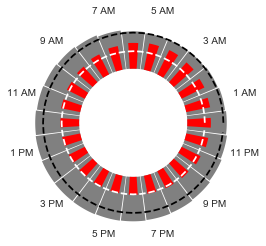

In [25]:
# %matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

hours = data['hour'].unique()
hours.sort()

cmap = cm.get_cmap('Greys', 12)

with plt.style.context('seaborn'):

    ax = plt.subplot(121, projection='polar')
#     ax.set_yscale('log')

    last_years_max_vol = 1
    thetas_wrt_hours = [np.pi*2*(1/24)*(hour) for hour in hours]
#     thetas_wrt_months.append(thetas_wrt_months[0])
        
#         monthly_volumes = data[mask].groupby('time_month')['Volume_(Currency)'].sum()/data[mask]['Volume_(Currency)'].sum()
    volume_per_hour = list( (data[data['Close'].notna()].groupby('hour')['Volume_(Currency)'].count()).values)
    
    #     volume_per_hour.append(volume_per_hour[0])
    bottom = max(volume_per_hour)*1.2
    
    volatility_per_hour = bottom*data[data['Close'].notna()].groupby('hour')['Close'].var()/data[data['Close'].notna()].groupby('hour')['Close'].var().max()
    
    ax.bar( thetas_wrt_hours,
            volume_per_hour, 
           bottom=bottom,
            width=np.pi*2*(1/360)*(360/25), 
            color=['grey'])
    ax.bar( thetas_wrt_hours,
            1.5*volatility_per_hour-bottom, 
           bottom=bottom,
            width=np.pi*(1/360)*(360/25), 
            color=['red'])
#     ax.plot( 0,
#             range(0,int(1.5*volatility_per_hour-bottom)*2), 
#             color='red')
    ax.plot( [(r*np.pi*2)/60 for r in range(60)],
            [min(1.5*volatility_per_hour) for i in range(60)],
            '--',
            color='white', 
            alpha=1)
    ax.plot( [(r*np.pi*2)/60 for r in range(60)],
            [min(volume_per_hour)+bottom for i in range(60)],
            '--',
            color='black', 
            alpha=1)
    plt.xticks(thetas_wrt_hours,
               ['' if h%2==0 else (str(h%12)+' AM' if h<12 else(str(h%12)+' PM' if h%12!=0 else ''))  for h in list(range(0,24))], 
               rotation=180,
              size=10)
#     ax.set_xticks(thetas_wrt_hours)
#     ax.set_xticklabels([str(h%12)+' AM' if h<12 else str(h%12)+' PM' for h in list(range(0,24))])
    ax.set_yticks([])
    ax.grid([])
    ax.set_facecolor('white')

    
    plt.show()

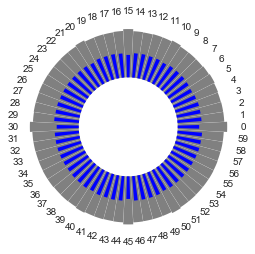

In [119]:
# %matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

hours = data['minute'].unique()
hours.sort()

cmap = cm.get_cmap('Greys', 12)

with plt.style.context('seaborn'):

    ax = plt.subplot(121, projection='polar')
#     ax.set_yscale('log')

    last_years_max_vol = 1
    thetas_wrt_hours = [np.pi*2*(1/60)*(hour) for hour in hours]
#     thetas_wrt_months.append(thetas_wrt_months[0])
        
#         monthly_volumes = data[mask].groupby('time_month')['Volume_(Currency)'].sum()/data[mask]['Volume_(Currency)'].sum()
    volume_per_hour = list( (data[data['Close'].notna()].groupby('minute')['Volume_(Currency)'].count()).values)
    
    #     volume_per_hour.append(volume_per_hour[0])
    bottom = max(volume_per_hour)
    
    volatility_per_hour = bottom*data[data['Close'].notna()].groupby('minute')['Close'].var()/data[data['Close'].notna()].groupby('minute')['Close'].var().max()
    
    ax.bar( thetas_wrt_hours,
            volume_per_hour, 
           bottom=bottom,
            width=np.pi*2*(1/360)*(360/61), 
            color=['grey'])
    ax.bar( thetas_wrt_hours,
            1.5*volatility_per_hour-bottom, 
           bottom=bottom,
            width=np.pi*(1/360)*(360/61), 
            color=['blue'])
#     ax.plot( 0,
#             range(0,int(1.5*volatility_per_hour-bottom)*2), 
#             color='red')
#     ax.plot( [(r*np.pi*2)/60 for r in range(60)],
#             [min(1.5*volatility_per_hour) for i in range(60)],
#             '--',
#             color='white', 
#             alpha=1)
#     ax.plot( [(r*np.pi*2)/60 for r in range(60)],
#             [min(volume_per_hour)+bottom for i in range(60)],
#             '--',
#             color='black', 
#             alpha=1)
    plt.xticks(thetas_wrt_hours,
               range(0, 60), 
               rotation=180,
              size=10)
#     ax.set_xticks(thetas_wrt_hours)
#     ax.set_xticklabels([str(h%12)+' AM' if h<12 else str(h%12)+' PM' for h in list(range(0,24))])
    ax.set_yticks([])
    ax.grid([])
    ax.set_facecolor('white')

    
    plt.show()

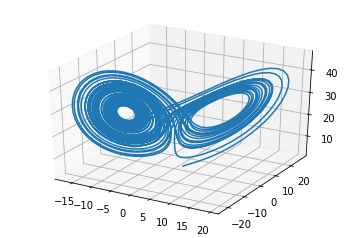

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0+np.random.random(1), t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

In [ ]:
monthly_close_std = data.groupby('time_month')['Close'].apply(lambda x: x/data.groupby('time_month')['Close'].mean()).std().astype(int)
monthly_close_std


-9223372036854775808

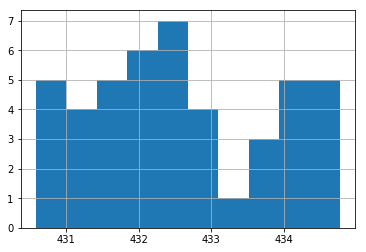

In [11]:
data[data['time_hour']==2016010115]['Close'].hist(bins=10)

In [374]:
[int(str(time_month)[-2:]) for time_month in data[data['time_year']==2016]['time_month'].unique()]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

years = data['time_year'].unique()
monthly_close_std = data.groupby('time_month')['Close'].std().apply(np.log).astype(int)


cmap = cm.get_cmap('Greys', monthly_close_std.max() )



thetas_wrt_months_all = [np.pi*2*(1/12)*(int(str(time_month)[-2:])) for time_month in data['time_month'].unique()]

with plt.style.context('bmh'):

    ax = plt.subplot(111)
#     ax.set_yscale('log')
    plt_no = 0
    
    bottom = np.sqrt(data['Volume_(BTC)'].sum()/np.pi)/5

    for year in years:
        
        
        
        mask = data['time_year'] == year
        
        thetas_wrt_months = [np.pi*2*(1/12)*(int(str(time_month)[-2:])) for time_month in data[mask]['time_month'].unique()]
        
        
    
        
        barmax = np.sqrt((data[mask]['Volume_(BTC)'].sum()/np.pi) + bottom**2)
        monthly_volumes_dist = ((barmax-bottom)*data[mask].groupby('time_month')['Volume_(BTC)'].sum()/data[mask].groupby('time_month')['Volume_(BTC)'].sum().max()).values
        monthly_close_std_in_year = [monthly_close_std[time_month] for time_month in data[mask]['time_month'].unique()]
        
        bottoms = [bottom+(i*max(monthly_volumes_dist)/len(monthly_volumes_dist)) for i in range(len(monthly_volumes_dist))]
        
        ax.bar(thetas_wrt_months,
               monthly_volumes_dist, 
               width=np.pi*24*(1/180), 
               bottom=bottoms, 
               color=[cmap(i) for i in monthly_close_std_in_year], 
               alpha=1)
        
        plt_no+=1
        
        bottom=bottom+max(monthly_volumes_dist)*1.2
        
    plt.xticks(thetas_wrt_months_all,
               ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
              size=10)
    ax.set_yticks([])
    ax.grid([])
    ax.set_facecolor('white')
    
    
    plt.show()

In [49]:
# cm.get_cmap('', monthly_close_std.max() )

In [60]:
data[mask].groupby('time_month')['Volume_(Currency)'].sum()/data[mask].groupby('time_month')['Volume_(Currency)'].sum().max()

time_month
201401    0.718587
201402    1.000000
201403    0.564508
201404    0.460478
201405    0.299604
201406    0.349772
201407    0.193664
201408    0.322636
201409    0.292220
201410    0.415107
201411    0.324337
201412    0.197308
Name: Volume_(Currency), dtype: float64

In [49]:
barmax

11.646186853943616

In [ ]:
thetas_wrt_months

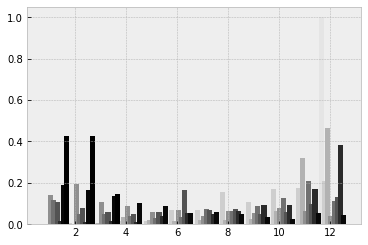

In [17]:
with plt.style.context('bmh'):
    plt_no = 0
    for year in years:
        mask = data['time_year'] == year
        plt.bar(data[mask]['month'].unique()-1/3+1/8*plt_no ,
                data[mask].groupby('month')['Volume_(Currency)'].sum()/data[mask]['Volume_(Currency)'].sum(), 
                1/5,
               color=cmap(20+plt_no*12))
        plt_no+=1
    plt.show()

In [268]:
# with plt.style.context('bmh'):
#     plt.bar(data['hour'].unique() ,data.groupby('hour')['Volume_(Currency)'].sum()/data['Volume_(Currency)'].sum(), 1/2)
# #     plt.bar(data['hour'].unique()+1/8 ,data.groupby('hour')['Volume_(BTC)'].sum()/data['Volume_(BTC)'].sum(), 1/5, color='darkblue') 
    
    

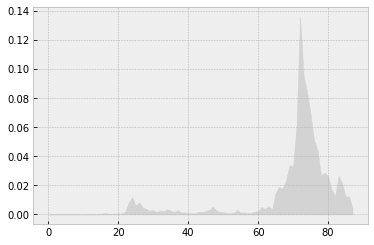

In [29]:

with plt.style.context('bmh'):
#     plt.plot(range(data['time_day'].nunique()), 
#             data.groupby('time_day')['Volume_(Currency)'].sum()/data['Volume_(Currency)'].sum(),
#             color = 'grey')
    plt.fill_between(range(data['time_month'].nunique()), 
            data.groupby('time_month')['Volume_(Currency)'].sum()/data['Volume_(Currency)'].sum(),
            color = 'lightgrey')
#     plt.plot(range(data['time_month'].nunique()), 
#             data.groupby('time_month')['Close'].mean()/data['Close'].max(),
#             color = 'blue')
    

In [31]:
data['time_month'].unique()

array([201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207,
       201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311,
       201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407,
       201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503,
       201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511,
       201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607,
       201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703,
       201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711,
       201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807,
       201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903])

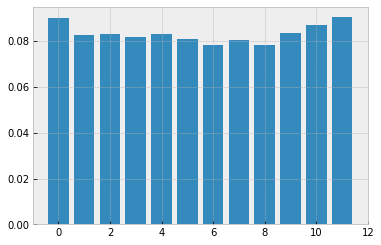

In [32]:
with plt.style.context('bmh'):
    plt.bar(range(data['month'].nunique()), 
            data.groupby('month')['Volume_(Currency)'].count()/data['Volume_(Currency)'].count())
    

## Market Activity

#### NA shares over days / months

NameError: name 'volume' is not defined

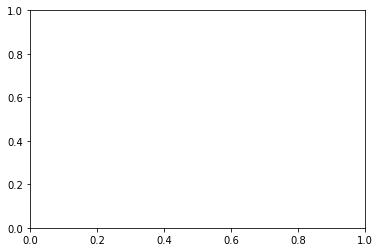

In [33]:
fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index
data1 = volume.values
data2 = (returns.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f911d0>,
      dtype=object)

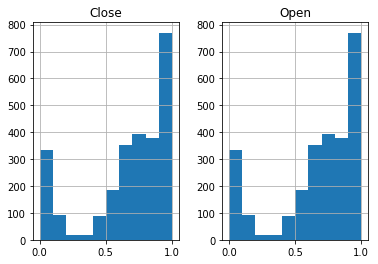

In [10]:
data.groupby('time_day')[['Close', 'Open']].agg(lambda x : sum(pd.notna(x))/len(x) ).hist()

In [2]:
import pandas as pd
df_trade = pd.read_csv('../../Data/Coins/BTC_USD/Trade_Data/BITSTAMP_TRADE_SPOTBTC_cum.csv' , index_col='time_exchange')

In [10]:
import matplotlib.pyplot as plt

m, k=0, 5000
volume= data.groupby('date')['Volume_(BTC)'].sum()[m+1:k+1]
count= data.groupby('date')['Volume_(BTC)'].mean()[m+1:k+1]
# daily_mean_volume
price=data.groupby('date')['Weighted_Price'].mean()[m+1:k+1]
log_returns =((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log)[m+1:k+1]
returns_keep_and_hold =((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean()[0]).apply(np.log)[m:k]
daily_close_price = data[data['Close'].notna()].groupby('date')['Close'].agg(lambda x: list(x)[-1])[m+1:k+1]



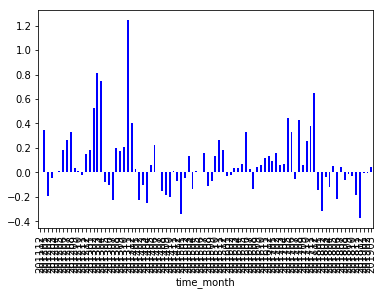

In [21]:
((data.groupby('time_month')['Close'].mean())/data.groupby('time_month')['Close'].mean().shift()).apply(np.log).plot.bar(color='b')

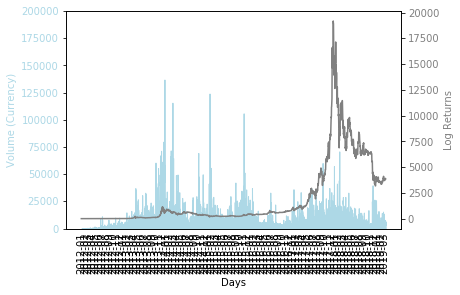

In [44]:
fig, ax1 = plt.subplots()

# Create some mock data
t = volume.index
data1 = volume.values
data2 = (daily_close_price.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
ax1.set_ylim(0, 200000)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey') 
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(-0.5, 0.5)



plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

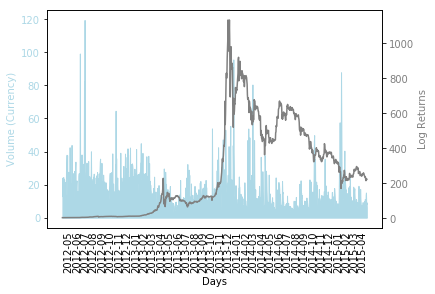

In [47]:
fig, ax1 = plt.subplots()

# Create some mock data
t = count.index
data1 = count.values
data2 = (daily_close_price.values)

ax1.set_xlabel('Days')
ax1.set_ylabel('Volume (Currency)', color='lightblue')
ax1.fill_between(t, 0, data1, color='lightblue' )
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.tick_params(axis='x', rotation=90, size=0.01)
# ax1.set_ylim(0, 500)

ax2 = ax1.twinx()


ax2.set_ylabel('Log Returns', color='grey')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
# ax2.set_ylim(0, 2)


plt.xticks([x for x in volume.index if str(x)[-2:]=='01'], 
           [str(x)[:7] for x in volume.index if str(x)[-2:]=='01'])

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

In [ ]:
tsplot()

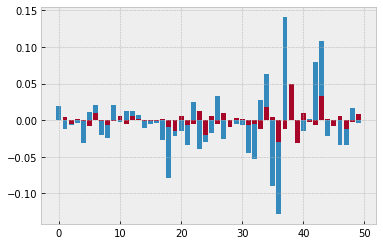

In [127]:
with plt.style.context('bmh'):
    plt.bar(range(50), lrets[750:2000][:50])
    plt.bar(range(50), best_mdl.predict()[:50])

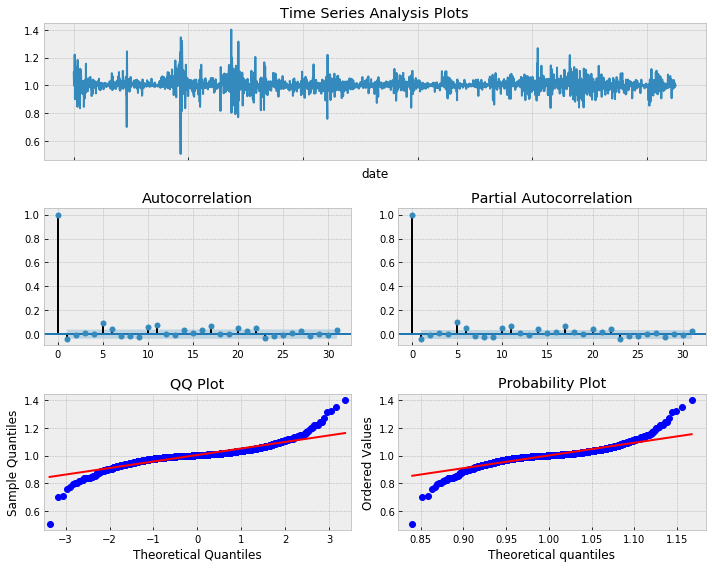

In [11]:
daily_close = data[data['Weighted_Price'].notna()].groupby('date')['Weighted_Price'].agg(lambda x: list(x)[-1])
daily_returns = (daily_close / daily_close.shift())
tsplot(daily_returns[1:], 31)

In [46]:
np.random.seed(1)
n_samples = int(1000)
a = 0
x = ((data.groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log).values   
_ = tsplot(x, lags=30)

NameError: name 'tsplot' is not defined

In [26]:
mask = data['Close'].notna()
lrets = ((data[].groupby('date')['Close'].mean())/data.groupby('date')['Close'].mean().shift()).dropna().apply(np.log).values

In [31]:
# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(lrets[:20000],
                      order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: %6.2f | order: %s'%(best_aic, best_order))

aic: -9604.91 | order: (4, 3)


<BarContainer object of 50 artists>

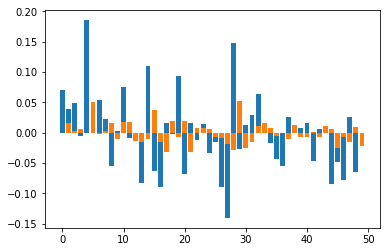

In [50]:
steps = 50

plt.bar(list(range(len(lrets[:steps]))), lrets[:steps])
plt.bar(list(range(len(lrets[:steps]))), best_mdl.predict()[:steps])
# best_mdl.predict()

In [ ]:
daily

In [48]:
best_mdl.params

array([ 0.28717279,  0.04680372, -0.60382837,  0.24217719, -0.05001554,
       -0.14736548,  0.53564295])

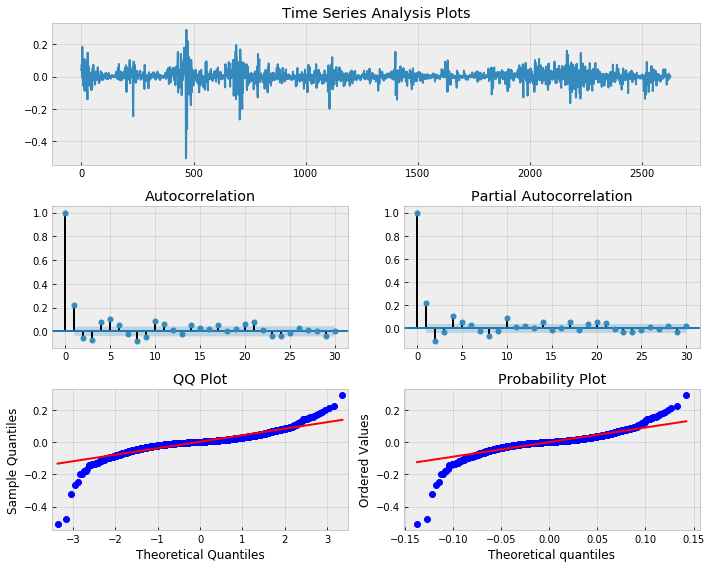

In [32]:
_ = tsplot(lrets[:20000], lags=30)

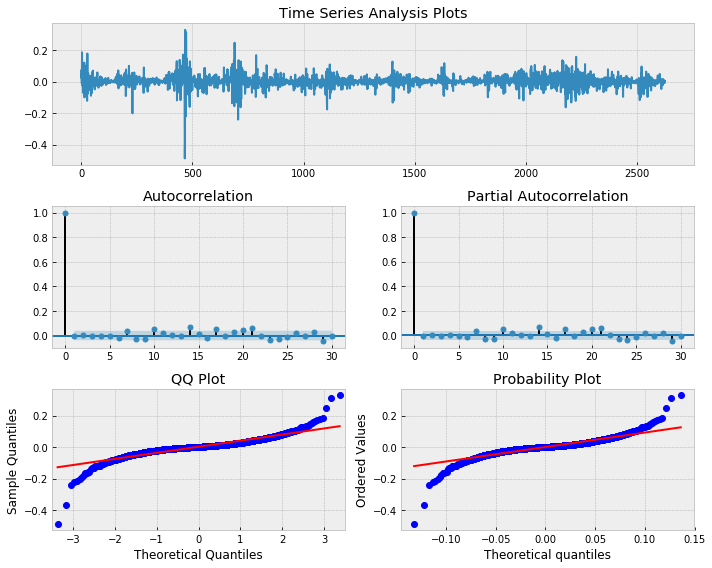

In [34]:
_ = tsplot(best_mdl.resid, lags=30)
# from statsmodels.stats.stattools import jarque_bera

# score, pvalue, _, _ = jarque_bera(mdl.resid)

# if pvalue < 0.10:
#     print(The residuals may not be normally distributed.')
# else:
#     print 'The residuals seem normally distributed.'

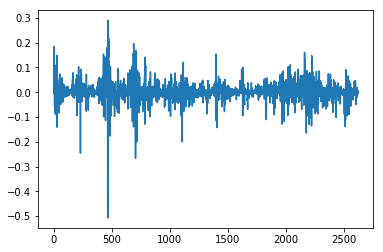

In [58]:
plt.plot(lrets)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: -7281.18 | order: (3, 0, 4)


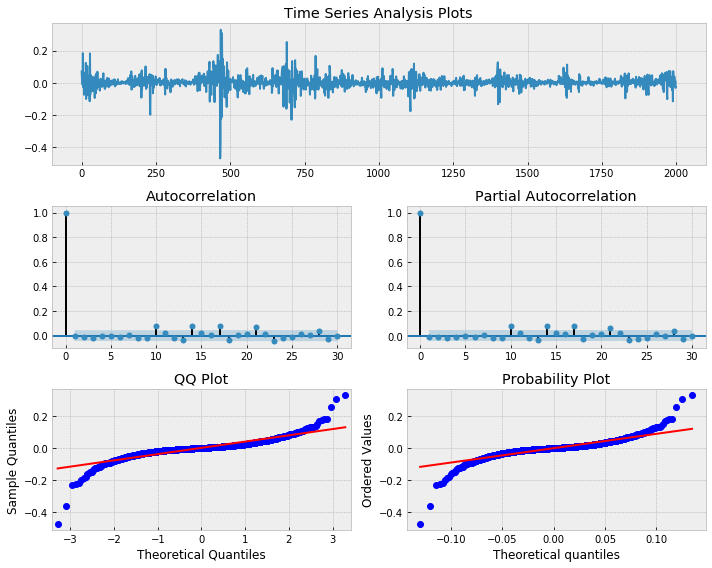

In [56]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(lrets[:2000], 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [57]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

(array([48.40104464]), array([0.00037361]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/s

aic: -6481.23 | order: (3, 0, 4)


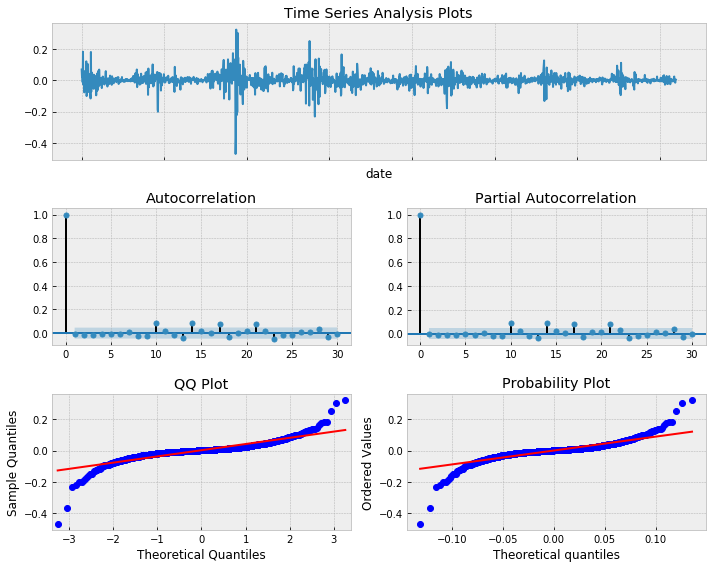

In [60]:
# Fit ARIMA(p, d, q) model to SPX log returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(log_returns[:1800], 
                          order=(i,d,j)).fit(method='mle',
                          trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

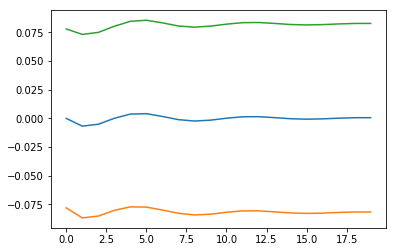

In [74]:
plt.plot(best_mdl.predi(20)[0])
plt.plot(best_mdl.forecast(20)[2])

In [60]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

(array([15.0968989]), array([0.77083643]))

In [ ]:
import pyESN
esn = pyESN.ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 5,
          random_state=42)

In [ ]:
trainlen = 1800
future = len(daily_close_price.values) - trainlen


pred_training = esn.fit(np.ones(trainlen),daily_close_price.values[:trainlen])
print("train error: \n"+str(np.sqrt(np.mean((pred_training.flatten() - daily_close_price.values[:trainlen])**2))))

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - daily_close_price.values[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),daily_close_price.values[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

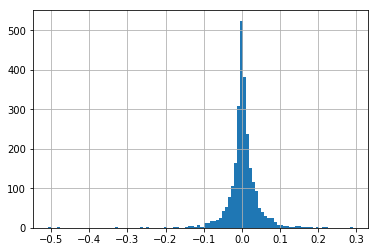

In [23]:
log_returns.hist(bins=100)